In [1]:
import requests
from bs4 import BeautifulSoup

# Taking user input

In [2]:
title = input('Enter the title: ')
print(title)

Enter the title: Virat Kohli
Virat Kohli


# Generate link

In [3]:
link = 'https://www.google.com/search?q=' + title.replace(' ', '+') + '+wikipedia'
print(link)

https://www.google.com/search?q=Virat+Kohli+wikipedia


<!DOCTYPE html>
<html lang="en-IN"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Virat Kohli wikipedia - Google Search</title><script nonce="-Ka-ClAAFXy4FD05KodFDQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=wi
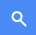
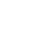
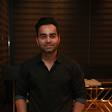

In [4]:
res = requests.get(link)
soup = BeautifulSoup(res.text)
soup

In [5]:
for sp in soup.find_all('div'):
    try:
        link = sp.find('a').get('href')
        if 'en.wikipedia.org' in link:
            break
    except:
        pass
    
link = link[7:].split('&')[0]
print(link)

https://en.wikipedia.org/wiki/Virat_Kohli


# Scrapping wikipedia page

In [6]:
res = requests.get(link)
soup = BeautifulSoup(res.text)

In [7]:
data = ""
for p in soup.find_all('p'):
    data += p.text
    data += '\n'

data = data.strip()
print(data)

Indian International cricketer

Recognition

Player of the year

Teams

Virat Kohli (born 5 November 1988) is an Indian international cricketer and former captain of the India national cricket team. He is widely regarded as one of the greatest batsman of all time and the best of his time.[3] Kohli plays as a right-handed batsman for Royal Challengers Bangalore in the Indian Premier League and for Delhi in Indian domestic cricket. With 40 wins out of 68 tests, Kohli is India's most successful test captain,and one of the most successful test captains of all time. He holds the record for being the highest run scorer in both IPL and in T20 internationals. He is also the highest run scorer in T20 WC history. He was chosen as the player of the decade by ICC in 2020.

Kohli made his Test debut in 2011.[4] He reached the number one spot in the ICC rankings for ODI batsmen for the first time in 2013.[5]  He has won Man of the Tournament twice at the ICC World Twenty20 (in 2014 and 2016). He is 

In [8]:
for i in range(500):
    data = data.replace('['+str(i)+']','')

print(data)

Indian International cricketer

Recognition

Player of the year

Teams

Virat Kohli (born 5 November 1988) is an Indian international cricketer and former captain of the India national cricket team. He is widely regarded as one of the greatest batsman of all time and the best of his time. Kohli plays as a right-handed batsman for Royal Challengers Bangalore in the Indian Premier League and for Delhi in Indian domestic cricket. With 40 wins out of 68 tests, Kohli is India's most successful test captain,and one of the most successful test captains of all time. He holds the record for being the highest run scorer in both IPL and in T20 internationals. He is also the highest run scorer in T20 WC history. He was chosen as the player of the decade by ICC in 2020.

Kohli made his Test debut in 2011. He reached the number one spot in the ICC rankings for ODI batsmen for the first time in 2013.  He has won Man of the Tournament twice at the ICC World Twenty20 (in 2014 and 2016). He is also the 

In [9]:
fd = open(title+'.txt', 'w', encoding = 'UTF-8')
fd.write(data)
fd.close()